# Module 3: Feature Extraction In Image

In this module, we will learn the basics of Feature extraction images using Python.

Upon completion of this module, you will be able to:

- Understand and implement various feature extractions from an image
- Able to extract various Histogram based, shape based, and Texture based features from an image
- Able to reduce data dimensionality using PCA

## 3.1 Histogram of an image

Let's load an image. We will use the Python OpenCV library `cv2`.

In [1]:
import numpy as np          # numpy is a package for scientific computing in Python
import cv2 as cv            # cv is a package for computer vision in Python

img = cv.imread('data/Histogram.png')

Let's display the image. We will use the [Matplotlib](https://matplotlib.org/3.5.0/tutorials/introductory/images.html) library to display images. We should note that OpenCV follows the BGR color convention whereas Matplotlib follows the RGB color convention. Thus, for the image to be rendered correctly, we have to make that conversion first.

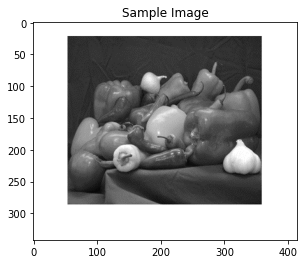

In [2]:
import matplotlib.pyplot as plt # matplotlib is a package for plotting data in Python

# this line is necessary to show the image in the notebook
#matplotlib inline

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)        # Convert from BGR to RGB color scheme

plt.imshow(img_rgb)
plt.title('Sample Image')
plt.show()

Matplotlib by default displayes the axes, which in this case correspond to pixel positions. If we don't want to show the axes, we can turn them off by calling the function `axis('off')`.

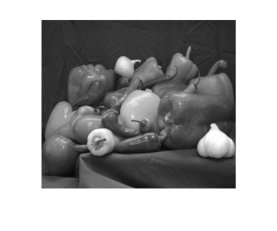

In [3]:
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

### What is histogram of an image?

Histograms plot how many times (frequency) each intensity value in an image occurs. in other words,  a histogram is a graphical representation showing how frequently various colour values occur in the image. 
As you already know, there are two basic types of images- **grayscale** and **Color** Image. We will get histogram for **gray Scale** image type. 

Let's explore the **Grayscale** histogram of the image above.

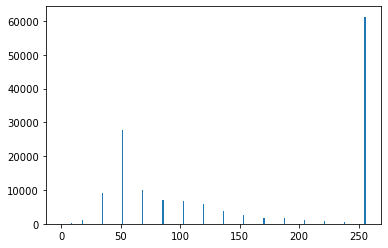

In [4]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('data/Histogram.png',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()


To get the histogram, a functoon named hist was used and it takes the following arguments

images : The source Image\
Bin : Represent the BIn count.In this case, we use 256\
Ranges : Range of the value. For gray scale, the range is [0-256]

From the histogram spread we can determine whether an image is under exposed, over exposed or correctly exposed. Let's get histogram of an image with various exposure. The term exposure mean here thta, whether an image is more brighter or darker.

**Under exposed Image Histogram**

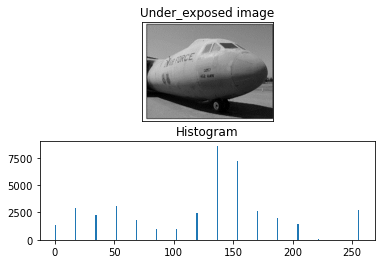

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img1 = cv.imread('data/Underexposed.png',0)
#plt.hist(img1.ravel(),256,[0, 256]); plt.show()


plt.subplot(2,1,1)
plt.imshow(img1,cmap='gray')
plt.title('Under_exposed image')
plt.xticks([])
plt.yticks([])

plt.subplot(2,1,2)
plt.hist(img1.ravel(),256,[0,256])
plt.title('Histogram')

plt.show()



Lets take look to the histogram of an under exposed image. As you can see that the intensity is highest in the range from approximately [140 -170]. And the intensity are not uniformy distributed among all of the bin.

Now, lets take alook to a properly exposed Histogram.

**Properly Exposed Histogram**

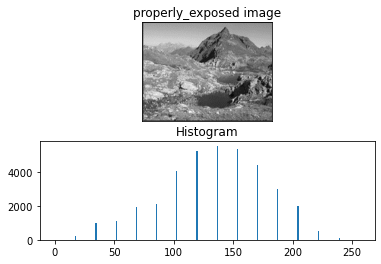

In [6]:

img2 = cv.imread('data/properly_exposed.png',0)
plt.hist(img2.ravel(),256,[0, 256]); 

plt.subplot(2,1,1)
plt.imshow(img2,cmap='gray')
plt.title('properly_exposed image')
plt.xticks([])
plt.yticks([])

plt.subplot(2,1,2)
plt.hist(img2.ravel(),256,[0,256])
plt.title('Histogram')

plt.show()



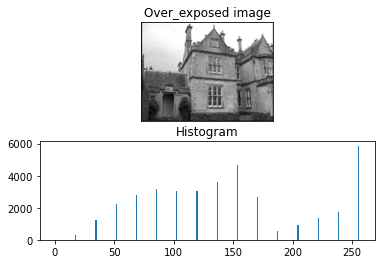

In [7]:

img3 = cv.imread('data/overexposed.png',0)
plt.hist(img2.ravel(),256,[0, 256]); 

plt.subplot(2,1,1)
plt.imshow(img3,cmap='gray')
plt.title('Over_exposed image')
plt.xticks([])
plt.yticks([])

plt.subplot(2,1,2)
plt.hist(img3
         .ravel(),256,[0,256])
plt.title('Histogram')

plt.show()



In [8]:
##Distribution of histogram for an over exposed image

## 3.2 Hough Transformation

**For line detection,** the OpenCV function, cv2.HoughLines() is used. It simply returns an array of (\rho, \theta) values. \rho is measured in pixels and \theta is measured in radians. First parameter, Input image should be a binary image, so apply threshold or use canny edge detection before finding applying hough transform. Second and third parameters are \rho and \theta accuracies respectively. Fourth argument is the threshold, which means minimum vote it should get for it to be considered as a line. Remember, number of votes depend upon number of points on the line. So it represents the minimum length of line that should be detected.

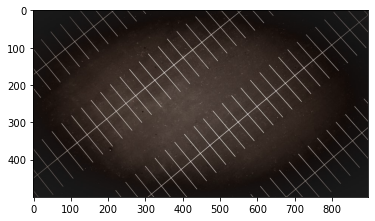

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Read image using cv2.imread function

image = cv2.imread('data/Line_hough.jpeg')
plt.imshow(image)

## Convert this image into Rgb color space bacuse opencv read image in BGR format by default

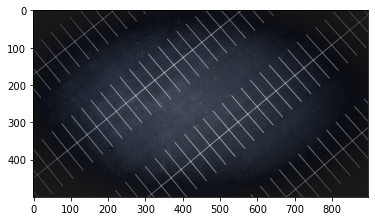

In [10]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

## Convert this Rgb image into Gray scale

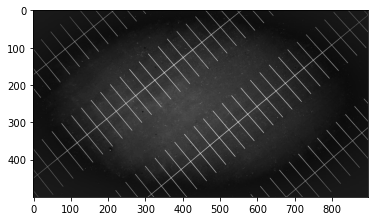

In [11]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

## Now apply Canny filter in order to obtain edges from this image

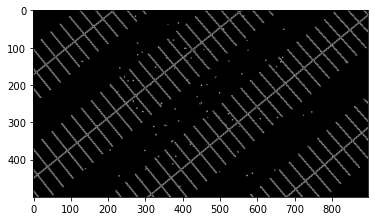

In [12]:
# define thresh hold values it can be varry according to image 
low_threshold = 90
high_threshold = 190
edges = cv2.Canny(gray, low_threshold, high_threshold)

plt.imshow(edges, cmap='gray')

## Define the Hough transform parameters

In [13]:
rho = 1
# rho stands for Distance resolution of the accumulator in pixels
theta = np.pi/180
# theta is angle resolution of the accumulator in radians
threshold = 40
# Only those lines are returned that get enough threshold
minLineLength = 20
# maxLineGap Maximum allowed gap between points on the same line to link them.
maxLineGap = 10
# Maximum allowed gap between points on the same line to link them.

line_image = np.copy(image) #creating an image copy to draw lines on

# Run Hough on the edge-detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        minLineLength, maxLineGap)
# here lines are cordinates of line that are obtained from Hough Transform
print("Total number of detected lines are :",len(lines))
print("Coordinates of first Line :", lines[5])

Total number of detected lines are : 208
Coordinates of first Line : [[  2 450 310 201]]


## Draw these lines on Original image

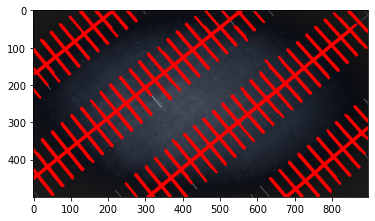

In [14]:
# Iterate over the output "lines" and draw lines on the rgb image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
        
plt.imshow(line_image)

# 3.3 Texture Feature (Skin Detection)  



Skin detection is a fundamental applications for various human centric application. There are many challenges involved in skin detection.Researchers tried to developed many approaces for efficient skin detection. Am ong them. color threshold based skin detection is popular. In this section, we will learn some threshold based skin detection in two color space: HSV and YCbCr. 

In [15]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt


# Input and display the image. The input image is a color image in RGB but for Opencv we need to convert it to BGR for further processing. This BGR format is a default format for OpenCV.

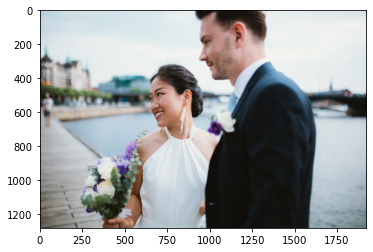

In [16]:
img2 = cv2.imread('data/texture_features.jpg') 
RGB_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img2);

# Converting the image to HSV Color space and using some threshold value to detect skin pixels. The threshold values are obtained by numerous trail and error process from various researchers.  

In [17]:
#converting to HSV
HSV_img2 = cv2.cvtColor(img2 , cv2.COLOR_BGR2HSV)

# define the upper and lower boundaries of the HSV pixel
# intensities to be considered 'skin'
lower = np.array([0, 46, 40],np.uint8)
upper = np.array([61, 180, 220],np.uint8)

#create skin mask
skinMaskHSV2 = cv2.inRange(HSV_img2, lower, upper)

#blur the mask to help remove noise
skinMaskHSV2 = cv2.GaussianBlur(skinMaskHSV2, (3, 3), 0)

#approximates the mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
skinMaskHSV2 = cv2.erode(skinMaskHSV2, kernel, iterations =1)
skinMaskHSV2 = cv2.dilate(skinMaskHSV2, kernel, iterations =1)

# apply the mask to the frame
HSV_skin2 = cv2.bitwise_not(img2 , mask = skinMaskHSV2)
HSV_skin2 = cv2.bitwise_not(HSV_skin2, mask = None)
HSV_skin2 = cv2.cvtColor(HSV_skin2, cv2.COLOR_BGR2RGB)

# YCrCb

In [18]:
#set the parameters to detect skin color
lower= np.array([11, 100, 124],np.uint8)
upper= np.array([255, 173, 145],np.uint8)

#get image
YCrCb_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2YCR_CB)

#create skin mask
skinMaskYCrCb2 = cv2.inRange(YCrCb_img2 , lower, upper)

# blur the mask to help remove noise
skinMaskYCrCb2 = cv2.GaussianBlur(skinMaskYCrCb2, (3, 3), 0)

#approximates the mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))

skinMaskYCrCb2 = cv2.erode(skinMaskYCrCb2, kernel, iterations = 1)
skinMaskYCrCb2 = cv2.dilate(skinMaskYCrCb2, kernel, iterations = 1)

#applies the mask to the image
YCrCb_skin2 = cv2.bitwise_not(img2, mask = skinMaskYCrCb2)
YCrCb_skin2 = cv2.bitwise_xor(YCrCb_skin2, img2, mask = None)

#convert the image into RGB
YCrCb_skin2 = cv2.cvtColor(YCrCb_skin2, cv2.COLOR_BGR2RGB)

# Ploting the results of Skin detection

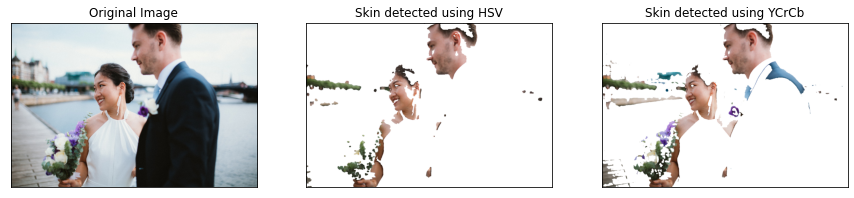

In [19]:
plt.figure(figsize=(15,10))

titles = ['Original Image', 'Skin detected using HSV','Skin detected using YCrCb']

images = [RGB_img2, HSV_skin2, YCrCb_skin2]
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()